# Test de l'opérateur ProblemDiscontinuSautdTdt

In [1]:
import sys

sys.path = ['/home/as259691/PycharmProjects/FluidDyn1D'] + sys.path

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib notebook
rc('figure', figsize=(10,5))
rc('figure', dpi=100)

In [19]:
n_lim = 12
t_fin_lim = 1.

In [7]:
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
phy_prop_ref = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                                  lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                                  alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=3.9*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=0.5)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

dt fourier
6.918433404737903e-06
energie_temperature
CL température saut dTdt Cas : mixte, euler, upwind, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224


<IPython.core.display.Javascript object>


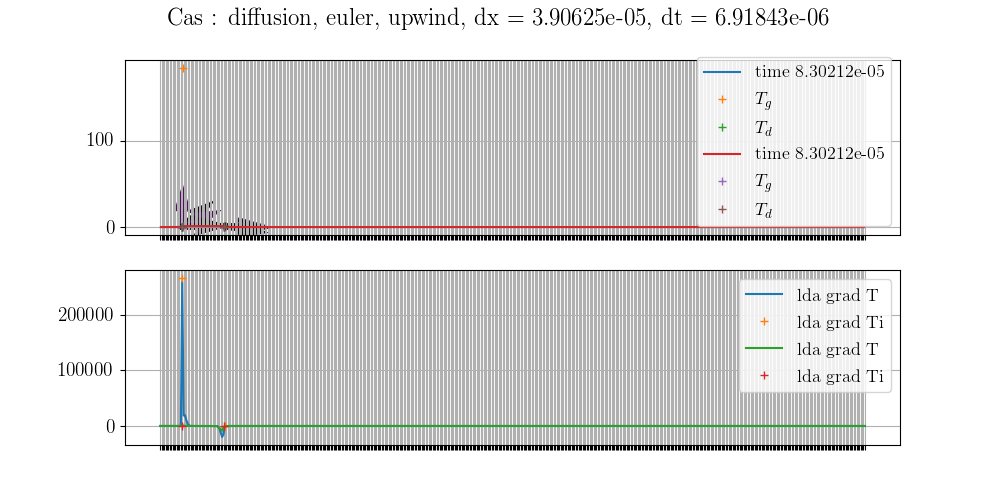

<IPython.core.display.Javascript object>


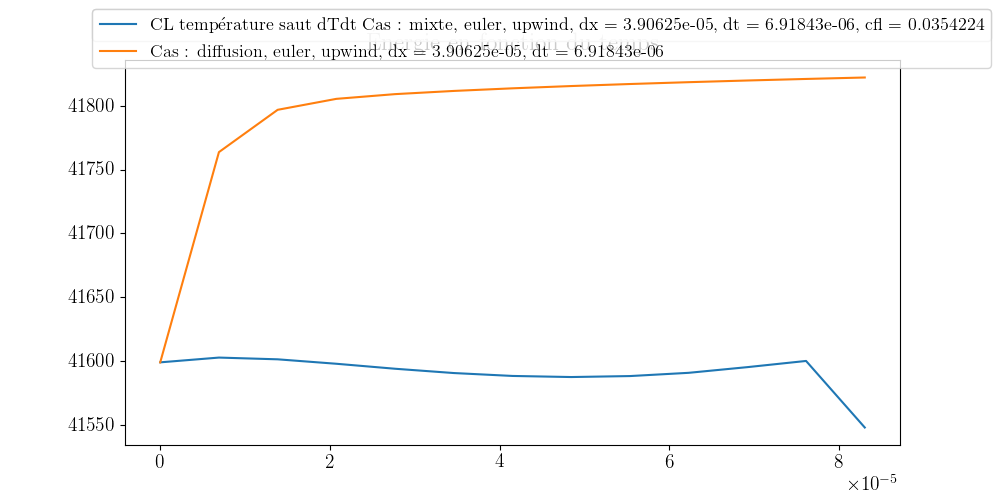

dE*/dt* = -0.000128507
dt fourier
6.918433404737903e-06
Cas : diffusion, euler, upwind, dx = 3.90625e-05, dt = 6.91843e-06
dE*/dt* ref = 6.08952e-05


In [20]:
t_fin = 0.2
prob = ProblemDiscontinuCoupleConserv(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob.energy
print(prob.name)
print('==========================')
plot = Plotter('classic')
t, e = prob.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)

fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* = %g' % dedt_adim)

prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop)
E1 = prob_ref.energy
print(prob_ref.name)
print('==========================')
t_ref, e_ref = prob_ref.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)

l = ax1.plot(t_ref, e_ref/(0.02*0.005*0.005), label=prob_ref.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

dedt_adim = (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* ref = %g' % dedt_adim)